<a href="https://colab.research.google.com/github/TerryHilario/TerryHilario/blob/main/TLKM_SARIMA_Stock_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fbprophet
!pip install -U statsmodels
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from scipy import stats 
from statsmodels.graphics.gofplots import qqplot as qq
from scipy.stats import kurtosis
import scipy
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.core.window.rolling import Rolling
from sklearn.model_selection import train_test_split as split
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import warnings
import itertools
warnings.filterwarnings("ignore")
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit
from fbprophet import Prophet
from IPython import display
from matplotlib import pyplot
import os
import re
from colorama import Fore, Back, Style
import seaborn as sns
import plotly.express as px
import warnings
from matplotlib.patches import Patch
##Matplotlib Parameters
import matplotlib.ticker as ticker
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
plt.style.context('fivethirtyeight')

In [ ]:
data = pd.read_csv('/content/TLKM.JK (1).csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       767 non-null    object 
 1   Open       767 non-null    float64
 2   High       767 non-null    float64
 3   Low        767 non-null    float64
 4   Close      767 non-null    float64
 5   Adj Close  767 non-null    float64
 6   Volume     767 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 42.1+ KB


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,767.000000,767.000000,767.000000,767.000000,767.000000,7.670000e+02
mean,3672.744459,3707.940026,3640.286832,3673.611473,3178.353329,8.424670e+07
std,666.149449,670.146505,661.824400,666.417781,615.850337,4.824422e+07
min,2550.000000,2605.000000,2485.000000,2600.000000,2220.499512,0.000000e+00
25%,2922.500000,2945.000000,2895.000000,2920.000000,2483.116577,5.521425e+07
50%,3860.000000,3890.000000,3830.000000,3850.000000,3319.130371,7.664240e+07
75%,4200.000000,4240.000000,4175.000000,4210.000000,3673.591430,1.000681e+08
max,4800.000000,4840.000000,4780.000000,4800.000000,4251.280273,3.797257e+08


In [ ]:
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')
data.set_index('Date',inplace=True)
data['Date'] = data.index

In [ ]:
data_feature_selected = data.drop(axis=1,labels=['Open','High','Low','Close','Volume'])

In [ ]:
col_order = ['Date','Adj Close']
data_feature_selected = data_feature_selected.reindex(columns=col_order)
data_feature_selected 

,Date,Adj Close
Date,,
2015-01-02,2015-01-02,2430.013184
2015-01-05,2015-01-05,2408.771973
2015-01-06,2015-01-06,2391.778809
2015-01-07,2015-01-07,2387.530518
2015-01-08,2015-01-08,2408.771973
...,...,...
2018-01-24,2018-01-24,3525.019775
2018-01-25,2018-01-25,3516.162842
2018-01-26,2018-01-26,3675.585693


In [ ]:
data_feature_selected = data_feature_selected.rename(columns = {"Date":"ds", "Adj Close":"y"})
data_feature_selected

,ds,y
Date,,
2015-01-02,2015-01-02,2430.013184
2015-01-05,2015-01-05,2408.771973
2015-01-06,2015-01-06,2391.778809
2015-01-07,2015-01-07,2387.530518
2015-01-08,2015-01-08,2408.771973
...,...,...
2018-01-24,2018-01-24,3525.019775
2018-01-25,2018-01-25,3516.162842
2018-01-26,2018-01-26,3675.585693


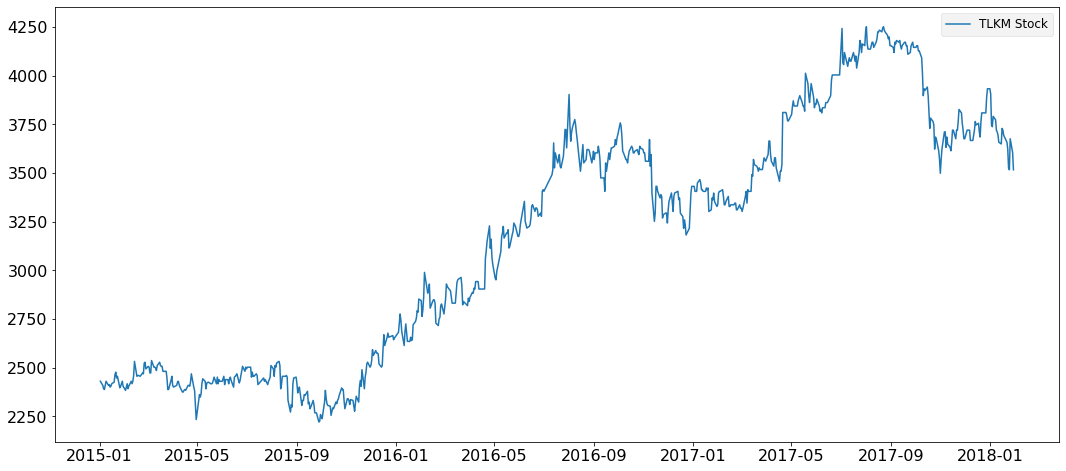

In [ ]:
fig = plt.figure(figsize=(18,8))
plt.plot(data_feature_selected ['y'],label='TLKM Stock')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.style.use('fivethirtyeight')
plt.legend(prop={'size': 12})
plt.show()

In [ ]:
data_feature_selected
data_feature_selected.index


DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-22',
               '2018-01-23', '2018-01-24', '2018-01-25', '2018-01-26',
               '2018-01-29', '2018-01-30'],
              dtype='datetime64[ns]', name='Date', length=767, freq=None)

In [ ]:
data_feature_selected

,ds,y
Date,,
2015-01-02,2015-01-02,2430.013184
2015-01-05,2015-01-05,2408.771973
2015-01-06,2015-01-06,2391.778809
2015-01-07,2015-01-07,2387.530518
2015-01-08,2015-01-08,2408.771973
...,...,...
2018-01-24,2018-01-24,3525.019775
2018-01-25,2018-01-25,3516.162842
2018-01-26,2018-01-26,3675.585693


In [ ]:
data_feature_selected[0:745]

,ds,y
Date,,
2015-01-02,2015-01-02,2430.013184
2015-01-05,2015-01-05,2408.771973
2015-01-06,2015-01-06,2391.778809
2015-01-07,2015-01-07,2387.530518
2015-01-08,2015-01-08,2408.771973
...,...,...
2017-12-25,2017-12-25,3808.438232
2017-12-26,2017-12-26,3808.438232
2017-12-27,2017-12-27,3808.438232


In [ ]:
def ad_fuller_func(X):
  result_ad_fuller = adfuller(X)
  print('ADF Statistic: %f' % result_ad_fuller[0])
  print('p-value: %f' %result_ad_fuller[1])
  print('Critical Values:')
  for key, value in result_ad_fuller[4].items():
	  print('\t%s: %.3f' % (key, value))
 
  if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
    print('Reject Null Hypothesis(Ho)-Time Series is Stationary')
  else:
    print('Failed to Reject Ho-Time Series is Non-Stationary')

In [ ]:
ad_fuller_func(data_feature_selected['y'])

ADF Statistic: -1.173159
p-value: 0.685034
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
Failed to Reject Ho-Time Series is Non-Stationary


In [ ]:
data_diff = data_feature_selected['y'] - data_feature_selected['y'].shift(1)

In [ ]:
data_diff

Date
2015-01-02           NaN
2015-01-05    -21.241211
2015-01-06    -16.993164
2015-01-07     -4.248291
2015-01-08     21.241455
                 ...    
2018-01-24    -97.425293
2018-01-25     -8.856933
2018-01-26    159.422851
2018-01-29    -70.854248
2018-01-30    -88.568603
Name: y, Length: 767, dtype: float64

In [ ]:
ad_fuller_func(data_diff[1:])

ADF Statistic: -16.860516
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
Reject Null Hypothesis(Ho)-Time Series is Stationary


In [ ]:
train = data_diff[1:745]
train

Date
2015-01-05   -21.241211
2015-01-06   -16.993164
2015-01-07    -4.248291
2015-01-08    21.241455
2015-01-09    21.241211
                ...    
2017-12-25     0.000000
2017-12-26     0.000000
2017-12-27     0.000000
2017-12-28    79.711670
2017-12-29    44.284180
Name: y, Length: 744, dtype: float64

In [ ]:
test = data_diff[745:]
test

Date
2018-01-01      0.000000
2018-01-02    -26.571045
2018-01-03   -159.422607
2018-01-04     -8.856690
2018-01-05     53.141114
2018-01-08    -17.713868
2018-01-09    -53.140381
2018-01-10     -8.857666
2018-01-11    -17.713378
2018-01-12    -35.427247
2018-01-15     -8.856933
2018-01-16     79.711670
2018-01-17     -8.856446
2018-01-18    -26.571044
2018-01-19     -8.856934
2018-01-22    -26.570313
2018-01-23    -35.427246
2018-01-24    -97.425293
2018-01-25     -8.856933
2018-01-26    159.422851
2018-01-29    -70.854248
2018-01-30    -88.568603
Name: y, dtype: float64

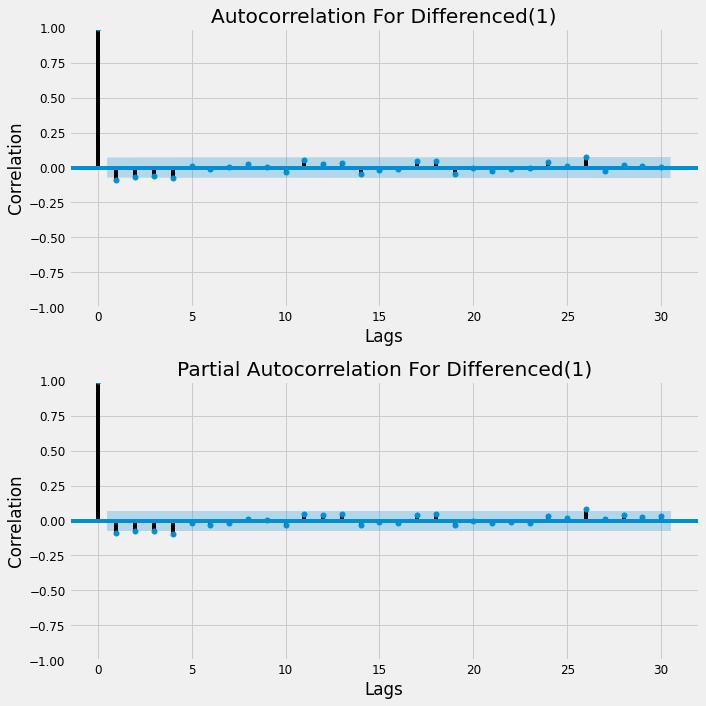

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
acf = plot_acf(train,lags=30,ax=ax1)
pacf = plot_pacf(train,lags=30,ax=ax2)
ax1.set_title('Autocorrelation For Differenced(1)')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_title('Partial Autocorrelation For Differenced(1)')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

In [ ]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of grid search Model parameter combinations for Seasonal-ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))

Examples of grid search Model parameter combinations for Seasonal-ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)


In [ ]:
list_param = []
list_param_seasonal=[]
list_results_aic=[]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = model.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            list_param.append(param)
            list_param_seasonal.append(param_seasonal)
            list_results_aic.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7843.579428014378
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:7728.591079135382
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:7611.1869253722325
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:8207.925584565572
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:7641.035051623145
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:7523.768850999131
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:8873.21540245402
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:7998.801828910236
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:7487.8353519528455
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:7738.204289808351
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:7730.5347919806445
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:7612.9417104836875
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:7880.2728622277555
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:7642.960048464663
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:7522.118771807772
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:8322.8388823689
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:7800.150881737825
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:7489.793560037068
ARIMA(0,

In [ ]:
#ARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:5917.848270707579

In [ ]:
  model = sm.tsa.statespace.SARIMAX(train,
                                            order=(0, 0, 2),
                                            seasonal_order=(1, 2, 2, 12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
  model_aic = model.fit()
  print(model_aic.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1241      0.026     -4.755      0.000      -0.175      -0.073
ma.L2         -0.0933      0.036     -2.587      0.010      -0.164      -0.023
ar.S.L12      -0.0093      0.043     -0.217      0.828      -0.093       0.075
ma.S.L12      -2.1044      0.043    -48.537      0.000      -2.189      -2.019
ma.S.L24       1.1045      0.051     21.722      0.000       1.005       1.204
sigma2      1968.3973   5.05e-05   3.89e+07      0.000    1968.397    1968.397


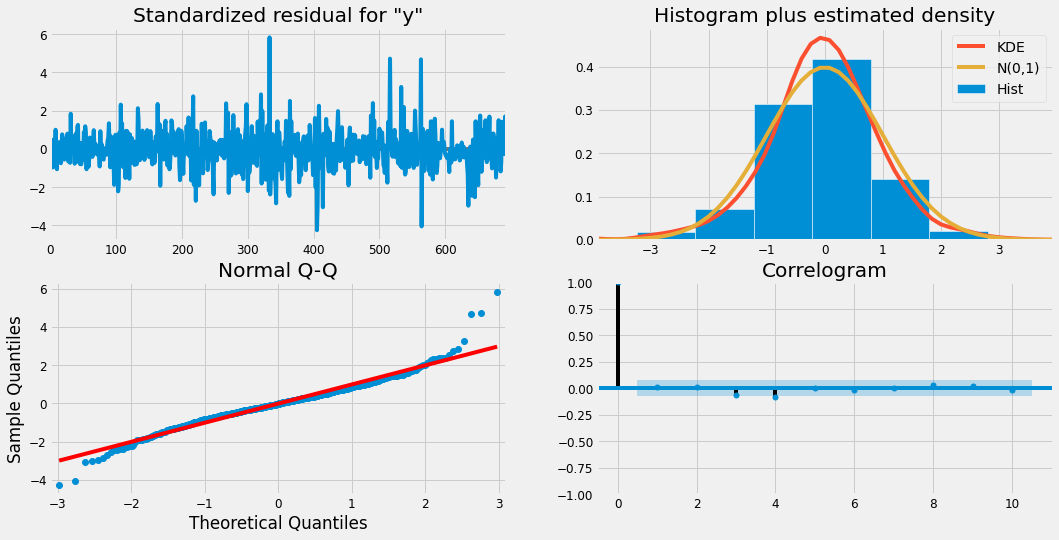

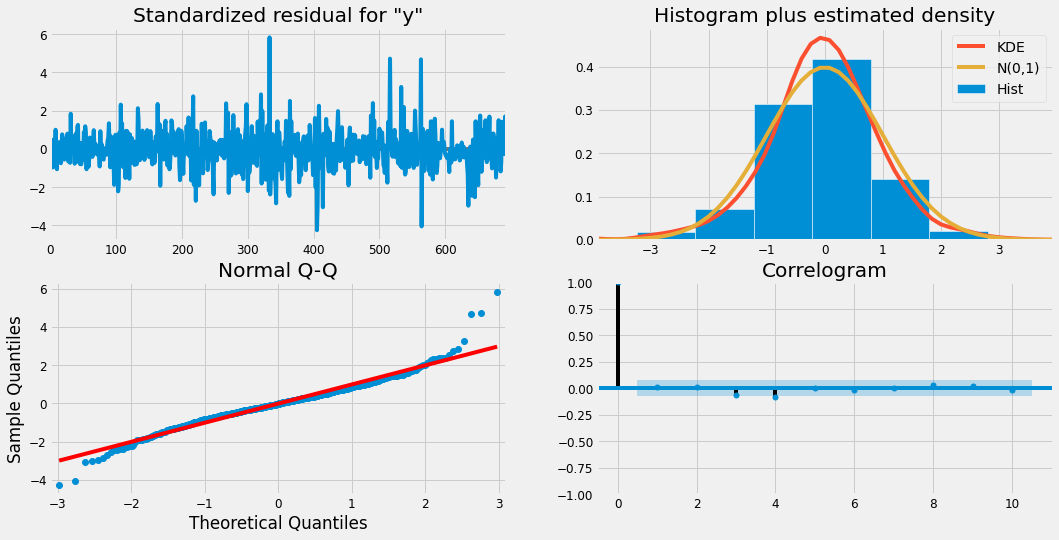

In [ ]:
model_aic.plot_diagnostics(figsize=(16,8))

In [ ]:
forecast = model_aic.get_prediction(periods=len(test)-2)
predictions = forecast.predicted_mean

In [ ]:
predictions

Date
2015-01-05     0.000000
2015-01-06     0.000000
2015-01-07     0.001383
2015-01-08     0.001353
2015-01-09    -0.001307
                ...    
2017-12-25   -16.113610
2017-12-26     7.570851
2017-12-27    13.497891
2017-12-28    -4.866499
2017-12-29    -5.484604
Name: predicted_mean, Length: 744, dtype: float64

In [ ]:
predictions

Date
2015-01-05     0.000000
2015-01-06     0.000000
2015-01-07     0.001383
2015-01-08     0.001353
2015-01-09    -0.001307
                ...    
2017-12-25   -16.113610
2017-12-26     7.570851
2017-12-27    13.497891
2017-12-28    -4.866499
2017-12-29    -5.484604
Name: predicted_mean, Length: 744, dtype: float64

In [ ]:
model_aic.forecast()

744   -31.70344
dtype: float64

In [ ]:
forecast = model_aic.forecast(steps= 22)
forecast

744   -31.703440
745   -25.150545
746    -2.853247
747    11.354419
748    -0.944499
749     8.148567
750     0.033402
751    -2.405594
752    12.923829
753    12.839552
754     2.236974
755     8.303536
756   -19.048373
757   -21.455373
758    -2.655106
759    10.962502
760    -1.285753
761     8.843787
762     0.552030
763    -2.432538
764    13.196573
765    13.128594
Name: predicted_mean, dtype: float64

In [ ]:
temp = data["Adj Close"]
temp = temp[744:766]
temp

Date
2017-12-29    3932.434082
2018-01-01    3932.434082
2018-01-02    3905.863037
2018-01-03    3746.440430
2018-01-04    3737.583740
2018-01-05    3790.724854
2018-01-08    3773.010986
2018-01-09    3719.870605
2018-01-10    3711.012939
2018-01-11    3693.299561
2018-01-12    3657.872314
2018-01-15    3649.015381
2018-01-16    3728.727051
2018-01-17    3719.870605
2018-01-18    3693.299561
2018-01-19    3684.442627
2018-01-22    3657.872314
2018-01-23    3622.445068
2018-01-24    3525.019775
2018-01-25    3516.162842
2018-01-26    3675.585693
2018-01-29    3604.731445
Name: Adj Close, dtype: float64

In [ ]:
temp_train = data['Adj Close']
temp_train = temp_train[:744]
temp_train

Date
2015-01-02    2430.013184
2015-01-05    2408.771973
2015-01-06    2391.778809
2015-01-07    2387.530518
2015-01-08    2408.771973
                 ...     
2017-12-22    3808.438232
2017-12-25    3808.438232
2017-12-26    3808.438232
2017-12-27    3808.438232
2017-12-28    3888.149902
Name: Adj Close, Length: 744, dtype: float64

In [ ]:
train_undiff = predictions + temp_train
train_undiff = train_undiff[1:744]
train_undiff

Date
2015-01-05    2408.771973
2015-01-06    2391.778809
2015-01-07    2387.531901
2015-01-08    2408.773326
2015-01-09    2430.011877
                 ...     
2017-12-22    3797.391533
2017-12-25    3792.324622
2017-12-26    3816.009083
2017-12-27    3821.936123
2017-12-28    3883.283403
Length: 743, dtype: float64

In [ ]:
forecast_undiff = pd.read_csv('/content/TLKM UNDIFF.csv')


In [ ]:

print('The Rsquare of forecast is',r2_score(list(temp_train[2:]), list(train_undiff[1:744])))
print('The Rsquare of forecast is',r2_score(list(forecast_undiff['y']), list(forecast_undiff['Hasil'])))

The Rsquare of forecast is 0.998469864194316
The Rsquare of forecast is 0.5799771020907268
